# Scaling up U-net diffusion

> In this module, we train a conditional U-net with a larger dataset

Adapted from:
- [https://www.youtube.com/watch?v=8AgZ9jcQ9v8&list=PLfYUBJiXbdtRUvTUYpLdfHHp9a58nWVXP&index=17](https://www.youtube.com/watch?v=8AgZ9jcQ9v8&list=PLfYUBJiXbdtRUvTUYpLdfHHp9a58nWVXP&index=17)

In [1]:
#| default_exp unet_diffusion_imagenet

In [19]:
# |export
import torch

from slowai.attention import ConditionalTAUnet, conditional_ddpm, conditional_train
from slowai.cos_revisited import aesthetics
from slowai.tinyimagenet_a import denorm, get_imagenet_dls
from slowai.utils import show_images

In [3]:
# |hide
aesthetics()

In [4]:
dls = get_imagenet_dls(bs=64)

How many classes do we have?

In [5]:
cs = set()
for xb, c in dls["test"]:
    cs.update(c.tolist())
max(cs)

199

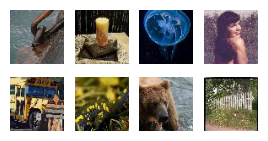

In [6]:
show_images(denorm(xb)[:8, ...], imsize=0.8)

In [7]:
un = ConditionalTAUnet(
    n_classes=200,
    color_channels=3,
    nfs=(32, 64, 128, 256, 384, 512),
    n_blocks=(3, 2, 1, 1, 1, 1, 1),
    attention_heads=(0, 8, 8, 8, 8, 8, 8),
)
f"{sum(p.numel() for p in un.parameters()):,}"

'34,446,784'

loss,epoch,train
0.148,0,train
0.107,0,eval


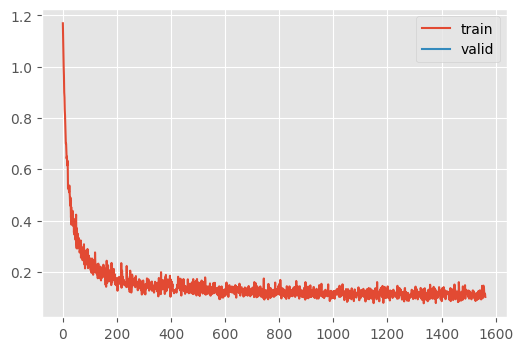

CPU times: user 6min 15s, sys: 1min 12s, total: 7min 28s
Wall time: 7min 31s


In [8]:
%%time
un = conditional_train(un, dls, lr=4e-3, n_epochs=1)

100%|████████████████████████████████████████████████████████████████████████████████████| 99/99 [00:01<00:00, 73.02time step/s]


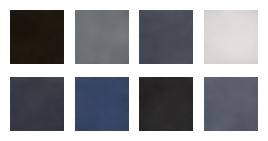

In [29]:
N = 8
x_0, _ = conditional_ddpm(un, torch.arange(N), (N, 3, 64, 64))
show_images(denorm(x_0.cpu()), imsize=0.8);

Not great 😂

In [9]:
#| hide
import nbdev

nbdev.nbdev_export()